<a href="https://colab.research.google.com/github/yogeshgajjar/CNN-CIFAR-10-image-classification/blob/master/CIFAR_10_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras.callbacks import CSVLogger
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow import keras
from keras.models import model_from_yaml
import numpy as np
import math 
from PIL import Image
import os

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(X_train)

In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
def allcnn(weights=None):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
        
    if weights:
        model.load_weights(weights)

    return model

In [0]:
model = allcnn()

In [0]:
batch_size = 64
num_classes = 10
epochs = 100
# weight_decay = 0.001
learning_rate = 0.001

In [0]:
sgd = SGD(lr=learning_rate, decay=learning_rate/epochs , momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [10]:
tf.keras.callbacks.CSVLogger("log.csv", separator=',', append=False)

csv_logger = CSVLogger('training.csv')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose = 1, callbacks=[csv_logger])



# history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=64), steps_per_epoch = len(X_train) / 64, epochs=epochs, validation_data=(X_test, y_test), verbose=1, callbacks=[csv_logger])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 236us/step - loss: 2.1718 - accuracy: 0.1823 - val_loss: 1.9668 - val_accuracy: 0.2929
Epoch 2/100
50000/50000 [==============================] - 6s 110us/step - loss: 1.9045 - accuracy: 0.3044 - val_loss: 1.7534 - val_accuracy: 0.3787
Epoch 3/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.7503 - accuracy: 0.3625 - val_loss: 1.7173 - val_accuracy: 0.3816
Epoch 4/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.6488 - accuracy: 0.3985 - val_loss: 1.7107 - val_accuracy: 0.3999
Epoch 5/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.5599 - accuracy: 0.4278 - val_loss: 1.4633 - val_accuracy: 0.4653
Epoch 6/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.4821 - accuracy: 0.4578 - val_loss: 1.4072 - val_accuracy: 0.4993
Epoch 7/100
50000/50000 [==============================

In [0]:
dropout = 0.5
learning_rate = 0.05
key = "SGD"
weight_decay = learning_rate/epochs
batch_size = 64 
xavier = False

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


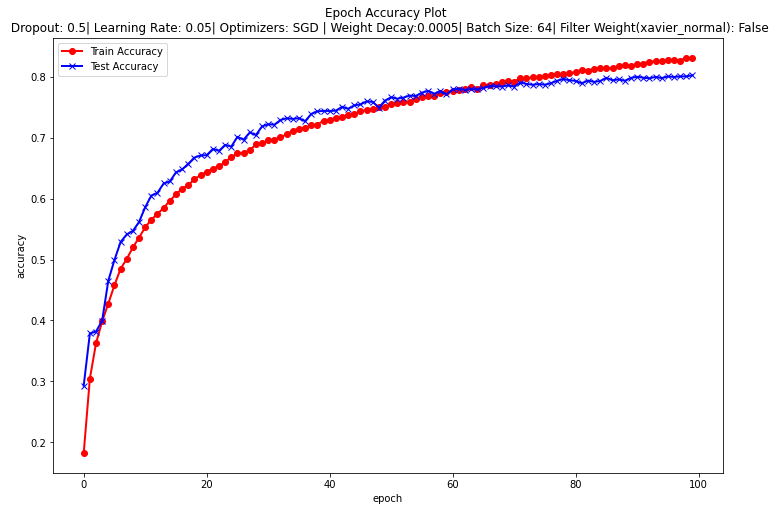

In [12]:
print(history.history.keys())
plt.figure(1, figsize=(12,8))
plt.plot(history.history['accuracy'], color='red', marker='o', linewidth=2)
plt.plot(history.history['val_accuracy'],color='blue', marker='x', linewidth=2)
plt.title("Epoch Accuracy Plot \n Dropout: "+str(dropout)+"| Learning Rate: "+str(learning_rate)+"| Optimizers: "+key+
              " | Weight Decay:"+str(weight_decay)+"| Batch Size: "+str(batch_size)+"| Filter Weight(xavier_normal): "+str(xavier))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.savefig("epoch-accuracy.png")
plt.show()

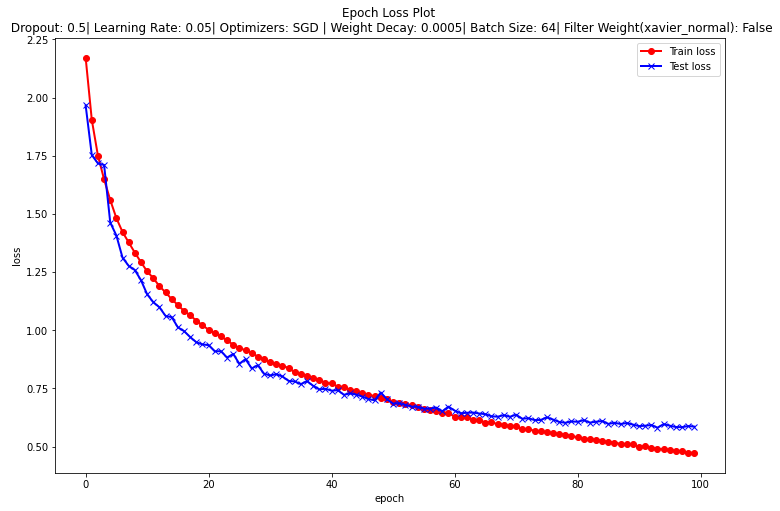

In [13]:
plt.figure(2, figsize=(12,8))
plt.plot(history.history['loss'], color='red', marker='o', linewidth=2)
plt.plot(history.history['val_loss'], color='blue', marker='x', linewidth=2)
plt.title("Epoch Loss Plot \n Dropout: "+str(dropout)+"| Learning Rate: "+str(learning_rate)+"| Optimizers: "+key+
              " | Weight Decay: "+str(weight_decay)+"| Batch Size: "+str(batch_size)+"| Filter Weight(xavier_normal): "+str(xavier))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.savefig("epoch-loss.png")
plt.show()

In [14]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

10000/10000 [==============================] - 1s 55us/step
Test score: 0.5859402404785157
Test accuracy: 0.8026000261306763


In [15]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_new.h5")
print("Saved model to disk")
 
# later...

Saved model to disk


In [16]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_new.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 80.26%
